In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/K-A-Reddy/Housing/main/datasets/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("data.csv"))

housing = load_housing_data()
housing.info()
housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=42)
print(housing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85    

In [3]:
#observe if text attributes can be categorized
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#check properties
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


AttributeError: module 'matplotlib' has no attribute 'show'

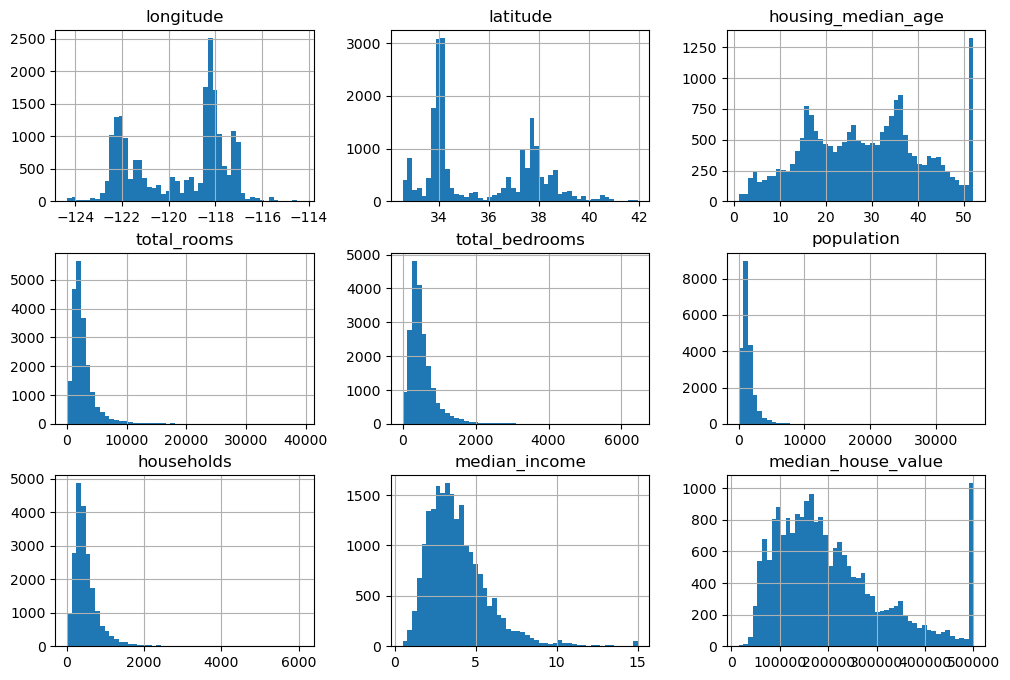

In [5]:
#plot a histogram to understand the data
import matplotlib as plt 
housing.hist(bins=50, figsize=[12,8])
plt.show()


<Axes: xlabel='latitude', ylabel='longitude'>

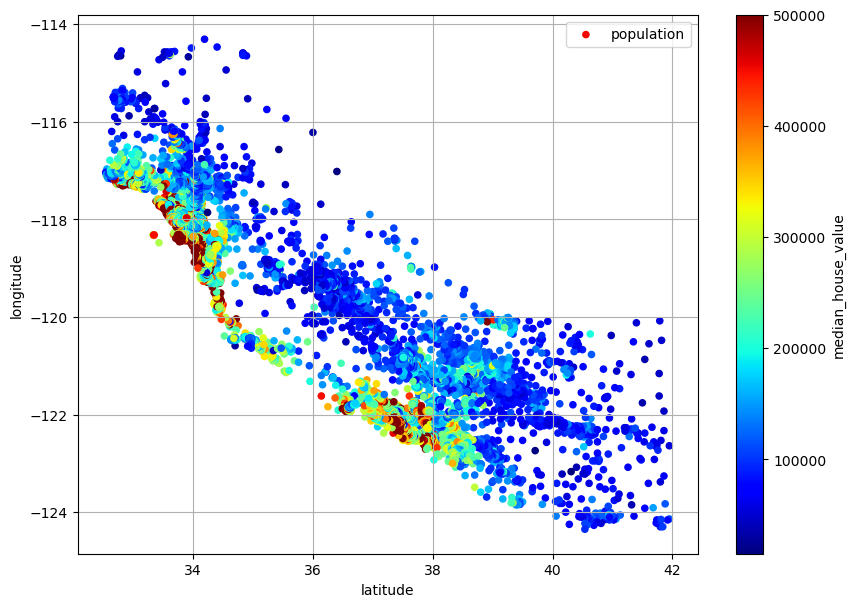

In [6]:
housing.plot(kind='scatter',x="latitude",y="longitude",grid=True,label='population',c="median_house_value",colormap="jet",colorbar= True,legend=True,figsize=(10,7))

In [7]:
#check for correlation
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

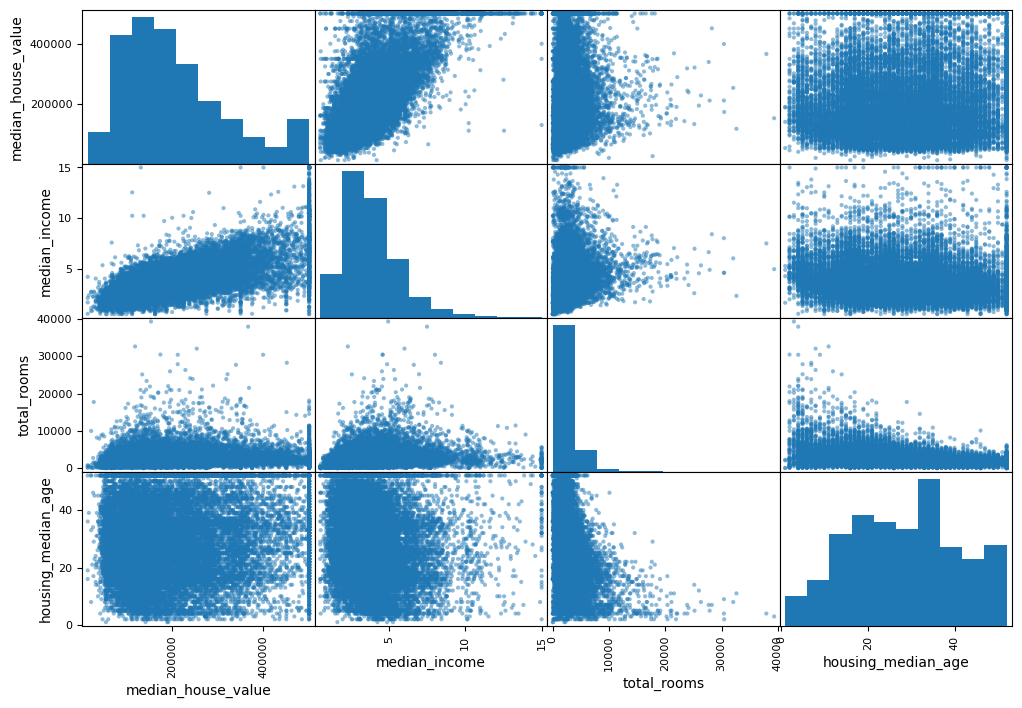

In [8]:
#plot scatter matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

In [10]:
#prepare the data for machine learning
X_train = housing_train.drop("median_house_value", axis=1)
y_train = housing_train["median_house_value"].copy()
X_test = housing_test.drop("median_house_value", axis=1)
y_test = housing_test["median_house_value"].copy()



In [11]:
#clean the data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#drop the text attribute
X_train_num = X_train.drop("ocean_proximity", axis=1)
imputer.fit(X_train_num)
X=imputer.transform(X_train_num)
# convert the numpy array to pandas dataframe
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns)


In [13]:
#transform the text attribute
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = cat_encoder.fit_transform(X_train[["ocean_proximity"]])


In [ ]:
#scaling and transformation
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std = std_scaler.fit_transform(X_train_num)

In [ ]:
#train the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_num_std, y_train)   

In [ ]:
#evaluate the model
from sklearn.metrics import cross_val_score
scores = cross_val_score(lin_reg, housing_num_std, y_train, scoring="neg_mean_squared_error", cv=10)